# Run Any Kind of OLS Regression (ANOVA, GLM, etc.)

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model (e.g., regression or T-tests) on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [55]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/Figures/group_level_figure'

Import Data

In [56]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/metadata/master_list.csv'
sheet = None

In [57]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subject,CerebellumSBM,CerebellumCSF,CerebellumCSFCount,CerebellumGM,CerebellumGMCount,cerebellumVisualCH,CerebellumWM,CerebellumWMCount,FrontalSurface,...,SubcortexGMCount,SubcortexWM,SubcortexWMCount,WholeBrainSurface,WholeBrainCSF,WholeBrainCSFCount,WholeBrainGM,WholeBrainGMCount,WholeBrainWM,WholeBrainWMCount
0,0001.nii,0,-4497.364934,16387,980.567621,24663,1,2977.241279,21397,-30.976181,...,37134,47774.191270,65104,-91.833611,-43714.850900,132083,-15942.769580,193017,68946.408350,187216
1,0002.nii,0,-2201.458697,16404,-18138.572720,24663,1,-11183.039810,21396,-36.083698,...,37140,-54299.851220,65103,-71.001053,-19536.494390,132115,-75878.032190,193026,-83971.989540,187201
2,0003.nii,0,5422.499148,16393,-5613.118199,24679,1,9831.510960,21446,-104.795906,...,37174,-27881.277790,65126,-308.820031,45092.829410,132254,-48384.405840,193082,-6820.499247,187463
3,0004.nii,0,10039.542490,16404,4899.249983,24663,2,6559.417793,21409,-252.720785,...,37173,24159.629610,65109,-635.076851,64515.424300,132354,-26500.982150,193064,60019.640710,187341
4,0005.nii,0,-807.610765,16387,-10722.003290,24663,1,-7145.779641,21396,-48.613606,...,37135,-25099.894340,65104,-113.106711,-15105.591270,132074,-49519.130740,193020,-39736.094230,187197
5,0006.nii,0,-2512.170377,16399,-1056.173682,24673,0,2425.407108,21402,-92.413730,...,37200,19615.848800,65106,-250.706665,-12286.997250,132151,-13155.112780,193123,43535.000940,187271
6,0007.nii,0,-3810.571029,16402,2017.963719,24687,1,2364.859302,21413,-72.367939,...,37170,1015.369562,65102,-201.237562,-16570.910670,132119,17525.514590,193081,12159.174960,187250
7,0008.nii,0,-1377.764614,16388,-301.016853,24679,1,1047.897930,21408,-257.644674,...,37212,16221.831910,65113,-682.055481,44137.916700,132506,-16775.888770,193118,34945.745630,187319
8,0009.nii,0,21528.922020,16460,10057.371230,24669,1,15527.412260,21417,-165.863003,...,37158,46823.220100,65121,-649.890714,96143.421810,132465,29120.807090,193049,98099.894660,187322
9,0010.nii,0,-331.479770,16387,-6104.352219,24663,1,580.351404,21397,-22.831228,...,37129,28175.902790,65102,-67.633763,-13476.156710,132091,-1646.868010,193011,43476.379280,187206


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [43]:
data_df.columns

Index(['subject', 'CerebellumSBM', 'CerebellumCSF', 'CerebellumCSFCount',
       'CerebellumGM', 'CerebellumGMCount', 'cerebellumVisualCH',
       'CerebellumWM', 'CerebellumWMCount', 'FrontalSurface', 'FrontalCSF',
       'FrontalCSFCount', 'FrontalGM', 'FrontalGMCount', 'frontalVisualCH',
       'FrontalWM', 'FrontalWMCount', 'InsularSurface', 'InsularCSF',
       'InsularCSFCount', 'InsularGM', 'InsularGMCount', 'InsularWM',
       'InsularWMCount', 'InsularVisualCH', 'MTLSurface', 'MTLVisualCH',
       'MTLCSF', 'MTLCSFCount', 'MTLGM', 'MTLGMCount', 'MTLWM', 'MTLWMCount',
       'OccipitalSurface', 'OccipitalCSF', 'OccipitalCSFCount', 'OccipitalGM',
       'OccipitalGMCount', 'occipitalVisualCH', 'OccipitalWM',
       'OccipitalWMCount', 'ParietalSurface', 'ParietalCSF',
       'ParietalCSFCount', 'ParietalGM', 'ParietalGMCount', 'parietalVisualCH',
       'ParietalWM', 'ParietalWMCount', 'TemporalSurface', 'TemporalCSF',
       'TemporalCSFCount', 'TemporalGM', 'TemporalGMCount', 

In [44]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_']

In [45]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

KeyError: ['Age', 'Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_']

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [46]:
data_df.columns

Index(['subject', 'CerebellumSBM', 'CerebellumCSF', 'CerebellumCSFCount',
       'CerebellumGM', 'CerebellumGMCount', 'cerebellumVisualCH',
       'CerebellumWM', 'CerebellumWMCount', 'FrontalSurface', 'FrontalCSF',
       'FrontalCSFCount', 'FrontalGM', 'FrontalGMCount', 'frontalVisualCH',
       'FrontalWM', 'FrontalWMCount', 'InsularSurface', 'InsularCSF',
       'InsularCSFCount', 'InsularGM', 'InsularGMCount', 'InsularWM',
       'InsularWMCount', 'InsularVisualCH', 'MTLSurface', 'MTLVisualCH',
       'MTLCSF', 'MTLCSFCount', 'MTLGM', 'MTLGMCount', 'MTLWM', 'MTLWMCount',
       'OccipitalSurface', 'OccipitalCSF', 'OccipitalCSFCount', 'OccipitalGM',
       'OccipitalGMCount', 'occipitalVisualCH', 'OccipitalWM',
       'OccipitalWMCount', 'ParietalSurface', 'ParietalCSF',
       'ParietalCSFCount', 'ParietalGM', 'ParietalGMCount', 'parietalVisualCH',
       'ParietalWM', 'ParietalWMCount', 'TemporalSurface', 'TemporalCSF',
       'TemporalCSFCount', 'TemporalGM', 'TemporalGMCount', 

Set the parameters for dropping rows

In [ ]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'Toronto' # The value to drop if found

In [ ]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [47]:
# Remove anything you don't want to standardize
cols_not_to_standardize = None # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']

In [48]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Unable to standardize column subject: Could not convert 0001.nii0002.nii0003.nii0004.nii0005.nii0006.nii0007.nii0008.nii0009.nii0010.nii0011.nii0012.nii0013.nii0014.nii0015.nii0016.nii0017.nii0018.nii0019.nii0020.nii0021.nii0022.nii0023.nii0024.nii0025.nii0026.nii0027.nii0028.nii0029.nii0030.nii0031.nii0032.nii0033.nii0034.nii0035.nii0036.nii0037.nii0038.nii0039.nii0040.nii0041.nii0042.nii0043.nii0044.nii0045.nii0046.nii0047.nii0048.nii0049.nii0050.nii to numeric


,subject,CerebellumSBM,CerebellumCSF,CerebellumCSFCount,CerebellumGM,CerebellumGMCount,cerebellumVisualCH,CerebellumWM,CerebellumWMCount,FrontalSurface,...,SubcortexGMCount,SubcortexWM,SubcortexWMCount,WholeBrainSurface,WholeBrainCSF,WholeBrainCSFCount,WholeBrainGM,WholeBrainGMCount,WholeBrainWM,WholeBrainWMCount
0,0001.nii,NaN,-1.140269,-0.846432,0.081904,-0.455822,0.248548,0.229820,-0.821065,0.854116,...,-0.643097,0.933677,-0.530182,0.930551,-1.567257,-0.779485,-0.264441,-0.671194,0.690730,-0.891922
1,0002.nii,NaN,-0.714776,0.381328,-1.712007,-0.455822,0.248548,-1.733147,-0.879881,0.792422,...,-0.566172,-1.549813,-0.602218,1.030363,-0.947188,-0.606001,-1.361320,-0.578686,-1.627496,-1.069595
2,0003.nii,NaN,0.698148,-0.413105,-0.536769,0.285352,0.248548,1.179993,2.060897,-0.037548,...,-0.130261,-0.907042,1.054602,-0.109065,0.710272,0.147570,-0.858158,-0.003084,-0.457888,2.033771
3,0004.nii,NaN,1.553811,0.381328,0.449586,-0.455822,1.801972,0.726399,-0.115278,-1.824321,...,-0.143081,0.359128,-0.170004,-1.672213,1.208377,0.689707,-0.457668,-0.188099,0.555401,0.588692
4,0005.nii,NaN,-0.456458,-0.846432,-1.016125,-0.455822,0.248548,-1.173482,-0.879881,0.641074,...,-0.630276,-0.839370,-0.530182,0.828628,-0.833555,-0.828278,-0.878924,-0.640358,-0.956885,-1.116975
5,0006.nii,NaN,-0.772359,0.020222,-0.109200,0.007412,-1.304877,0.153322,-0.526987,0.112016,...,0.203083,0.248577,-0.386111,0.169365,-0.761270,-0.410832,-0.213424,0.418340,0.305496,-0.240452
6,0007.nii,NaN,-1.012988,0.236885,0.179240,0.655939,0.248548,0.144929,0.119984,0.354147,...,-0.181544,-0.203978,-0.674254,0.406379,-0.871134,-0.584316,0.348063,-0.013362,-0.170158,-0.489195
7,0008.nii,NaN,-0.562123,-0.774211,-0.038345,0.285352,0.248548,-0.037635,-0.174094,-1.883797,...,0.356934,0.166000,0.118138,-1.897295,0.685783,1.513757,-0.279688,0.366947,0.175283,0.328104
8,0009.nii,NaN,3.683101,4.425713,0.933562,-0.177882,0.248548,1.969586,0.355246,-0.775173,...,-0.335395,0.910540,0.694424,-1.743189,2.019497,1.291480,0.560270,-0.342278,1.132693,0.363639
9,0010.nii,NaN,-0.368219,-0.846432,-0.582860,-0.455822,0.248548,-0.102448,-0.821065,0.952498,...,-0.707202,0.456845,-0.674254,1.046496,-0.791767,-0.736114,-0.002811,-0.732866,0.304607,-1.010371


In [ ]:
# for col in data_df.columns:
#     if 'CSF' and 'eh' not in col:
#         data_df[col] = data_df[col] * -1

# 02 - Quick ANOVA

In [41]:
data_df.columns

Index(['subject', 'CerebellumSBM', 'CerebellumCSF', 'CerebellumCSFCount',
       'CerebellumGM', 'CerebellumGMCount', 'cerebellumVisualCH',
       'CerebellumWM', 'CerebellumWMCount', 'FrontalSurface', 'FrontalCSF',
       'FrontalCSFCount', 'FrontalGM', 'FrontalGMCount', 'frontalVisualCH',
       'FrontalWM', 'FrontalWMCount', 'InsularSurface', 'InsularCSF',
       'InsularCSFCount', 'InsularGM', 'InsularGMCount', 'InsularWM',
       'InsularWMCount', 'InsularVisualCH', 'MTLSurface', 'MTLVisualCH',
       'MTLCSF', 'MTLCSFCount', 'MTLGM', 'MTLGMCount', 'MTLWM', 'MTLWMCount',
       'OccipitalSurface', 'OccipitalCSF', 'OccipitalCSFCount', 'OccipitalGM',
       'OccipitalGMCount', 'occipitalVisualCH', 'OccipitalWM',
       'OccipitalWMCount', 'ParietalSurface', 'ParietalCSF',
       'ParietalCSFCount', 'ParietalGM', 'ParietalGMCount', 'parietalVisualCH',
       'ParietalWM', 'ParietalWMCount', 'TemporalSurface', 'TemporalCSF',
       'TemporalCSFCount', 'TemporalGM', 'TemporalGMCount', 

Select Columns

In [64]:
data_df = data_df.loc[:, ['ParietalSurface', 'ParietalCSF',
        'ParietalGM',  'parietalVisualCH',
       'ParietalWM']]

Melt the Dataframe

In [65]:
import pandas as pd

def melt_dataframe(df, var_name='group', value_name='value'):
    """
    Melts a wide-format DataFrame into a long format.

    Parameters:
    df (DataFrame): The wide-format DataFrame to be melted.
    var_name (str): The name to be given to the 'variable' column in the melted DataFrame.
    value_name (str): The name to be given to the 'value' column in the melted DataFrame.

    Returns:
    DataFrame: The melted long-format DataFrame.
    """
    melted_df = df.reset_index().melt(id_vars='index', var_name=var_name, value_name=value_name)
    melted_df = melted_df.drop(columns='index')  # Remove the 'index' column if not needed
    return melted_df


In [66]:
value = 'damage_score'
variable = 'region'

In [67]:
melted_df = melt_dataframe(data_df, var_name=variable, value_name=value)

In [68]:
melted_df

,region,damage_score
0,ParietalSurface,-15.886484
1,ParietalSurface,-19.443029
2,ParietalSurface,-86.279572
3,ParietalSurface,-238.423797
4,ParietalSurface,-34.887828
...,...,...
245,ParietalWM,-11758.261580
246,ParietalWM,6020.239961
247,ParietalWM,9322.989029
248,ParietalWM,-5904.017567


                 sum_sq     df             F  PR(>F)
C(region)  3.007340e-30    4.0  7.367982e-31     1.0
Residual   2.500000e+02  245.0           NaN     NaN
                 A                 B       mean(A)       mean(B)  \
0      ParietalCSF        ParietalGM -2.220446e-17  1.110223e-17   
1      ParietalCSF   ParietalSurface -2.220446e-17 -8.881784e-18   
2      ParietalCSF        ParietalWM -2.220446e-17 -1.776357e-17   
3      ParietalCSF  parietalVisualCH -2.220446e-17 -1.532108e-16   
4       ParietalGM   ParietalSurface  1.110223e-17 -8.881784e-18   
5       ParietalGM        ParietalWM  1.110223e-17 -1.776357e-17   
6       ParietalGM  parietalVisualCH  1.110223e-17 -1.532108e-16   
7  ParietalSurface        ParietalWM -8.881784e-18 -1.776357e-17   
8  ParietalSurface  parietalVisualCH -8.881784e-18 -1.532108e-16   
9       ParietalWM  parietalVisualCH -1.776357e-17 -1.532108e-16   

           diff        se             T  p-tukey        hedges  
0 -3.330669e-17  0.202031 -

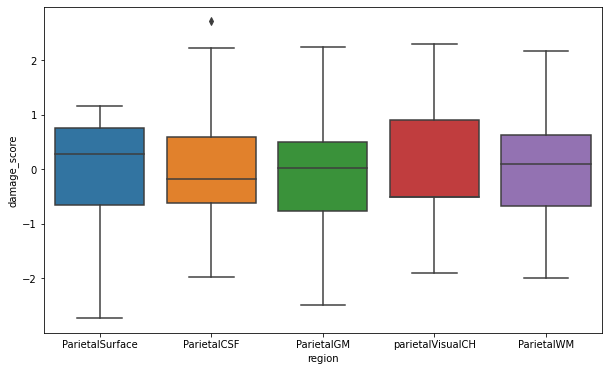

In [54]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, 'group' is the categorical variable, and 'value' is the continuous variable.

# Perform ANOVA
model = ols(f'{value} ~ C({variable})', data=melted_df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)
# Conduct posthoc test
posthoc = pg.pairwise_tukey(data=melted_df, dv=value, between=variable)
print(posthoc)
# Visualization
plt.figure(figsize=(10, 6))

sns.boxplot(x=variable, y=value, data=melted_df)
plt.show()

# To visualize posthoc results, you might need to parse the posthoc DataFrame and use it in your visualizations.


Quick ANOVA

In [63]:
melted_df

,region,damage_score
0,subject,0001.nii
1,subject,0002.nii
2,subject,0003.nii
3,subject,0004.nii
4,subject,0005.nii
...,...,...
3645,WholeBrainWMCount,187226
3646,WholeBrainWMCount,187241
3647,WholeBrainWMCount,187325
3648,WholeBrainWMCount,187258


F-Value: 4.396105736888522, P-Value: 0.0018895019140328223


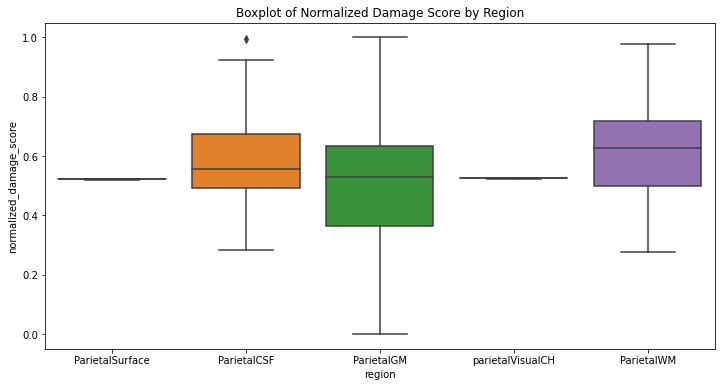

In [70]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'region' and 'damage_score' columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'damage_score' column
melted_df['normalized_damage_score'] = scaler.fit_transform(melted_df[['damage_score']])

# Perform one-way ANOVA with normalized scores
groups = melted_df['region'].unique()
group_values = [melted_df[melted_df['region'] == group]['normalized_damage_score'].values for group in groups]
f_value, p_value = stats.f_oneway(*group_values)
print(f"F-Value: {f_value}, P-Value: {p_value}")

# Visualization with normalized scores
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='normalized_damage_score', data=melted_df)
plt.title('Boxplot of Normalized Damage Score by Region')
plt.show()
